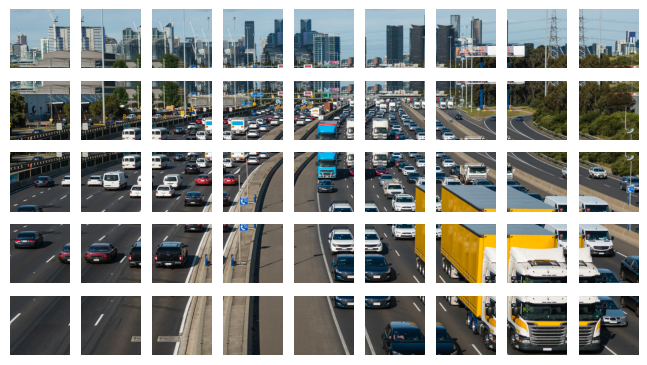

Number of generated images: 45


In [1]:
from nodes.MakeCropsDetectThem import MakeCropsDetectThem
from nodes.CombineDetectionsNode import CombineDetectionsNode
from functions_extra import visualize_results
import cv2
import matplotlib.pyplot as plt

img_path = 'test_images/image-test.jpg'
img = cv2.imread(img_path)

element = MakeCropsDetectThem(image=img, model_path="yolov8m-seg.pt", segment=True, show_crops=True, shape_x=700, shape_y=700, resize_results=False)

In [22]:
element.crops[20].detected_xyxy_real

[[1423, 1510, 1670, 1686],
 [1556, 1312, 1749, 1445],
 [1302, 1077, 1443, 1160],
 [1092, 1430, 1319, 1587],
 [1050, 1077, 1236, 1252],
 [1430, 1182, 1614, 1312],
 [1177, 1304, 1416, 1489],
 [1559, 1119, 1713, 1234],
 [1663, 1050, 1749, 1168],
 [1050, 1324, 1075, 1463],
 [1473, 1068, 1622, 1170],
 [1463, 1050, 1600, 1111]]

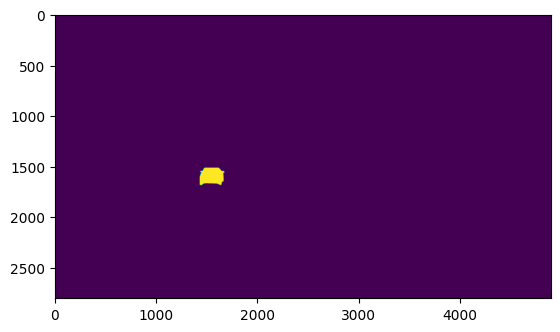

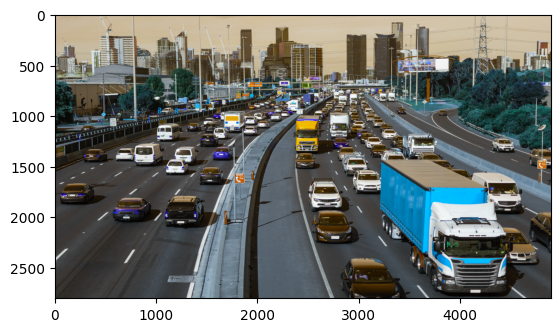

In [25]:
plt.imshow(element.crops[20].detected_masks_real[0]);
plt.show()
plt.imshow(element.crops[20].source_image_resized);

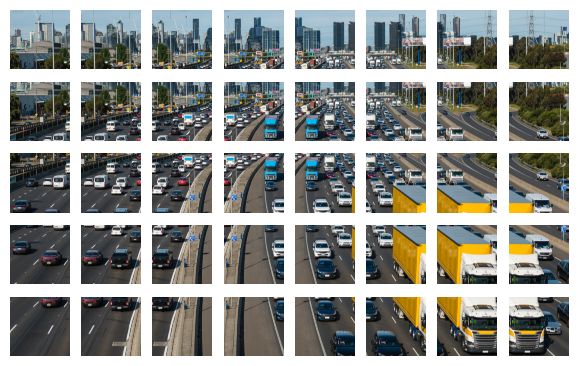

Number of generated images: 40


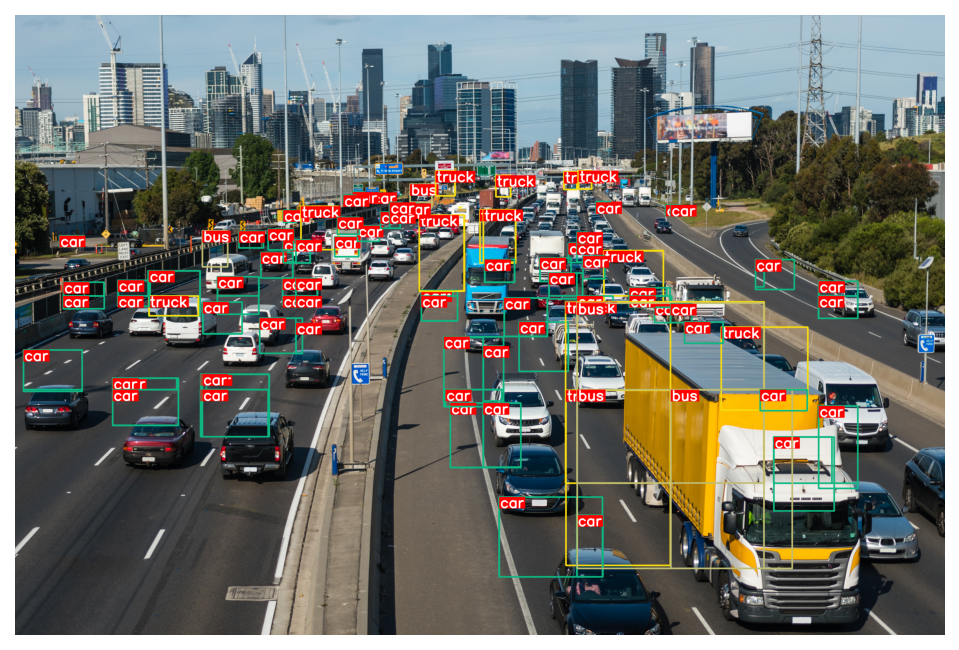

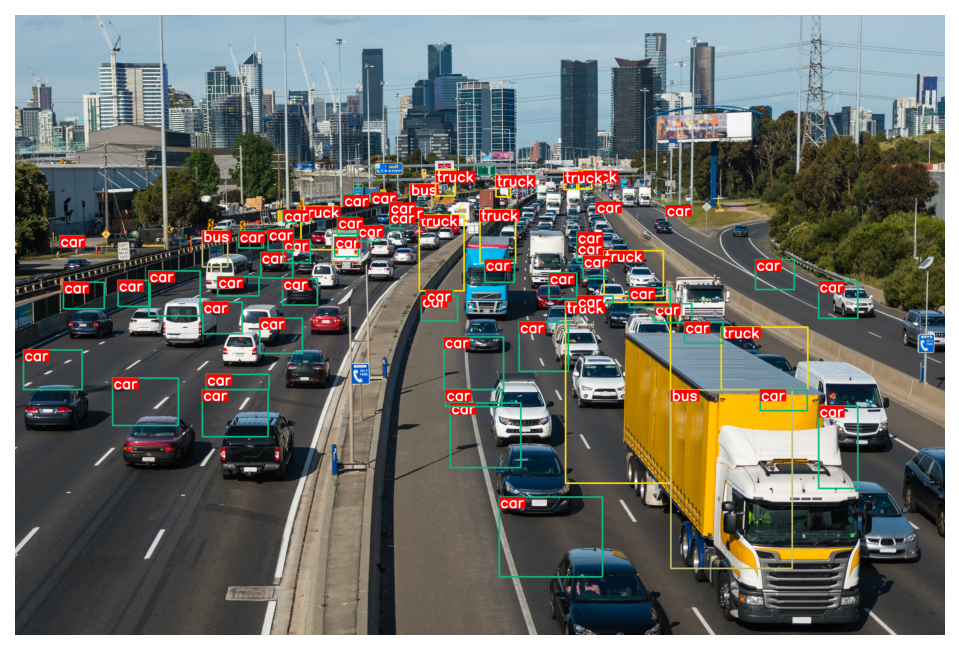

In [16]:
element_crops = MakeCropsDetectThem(image=img, model_path="yolov8l.pt", segment=False, show_crops=True,
            shape_x=1000, shape_y=1000, overlap_x=50, overlap_y=50, conf=0.7, resize_results=False)
result = CombineDetectionsNode(element_crops, nms_iou=0.1)


visualize_results(
    img=result.image,
    confidences=result.detected_conf_list_full,
    boxes=result.detected_xyxy_list_full,
    masks=result.detected_masks_list_full,
    classes_ids=result.detected_cls_id_list_full,
    classes_names=result.detected_cls_names_list_full,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=False,
    show_boxes=True,
    delta_colors=3,
)


visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    masks=result.filtered_masks,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=False,
    show_boxes=True,
    delta_colors=3,
)

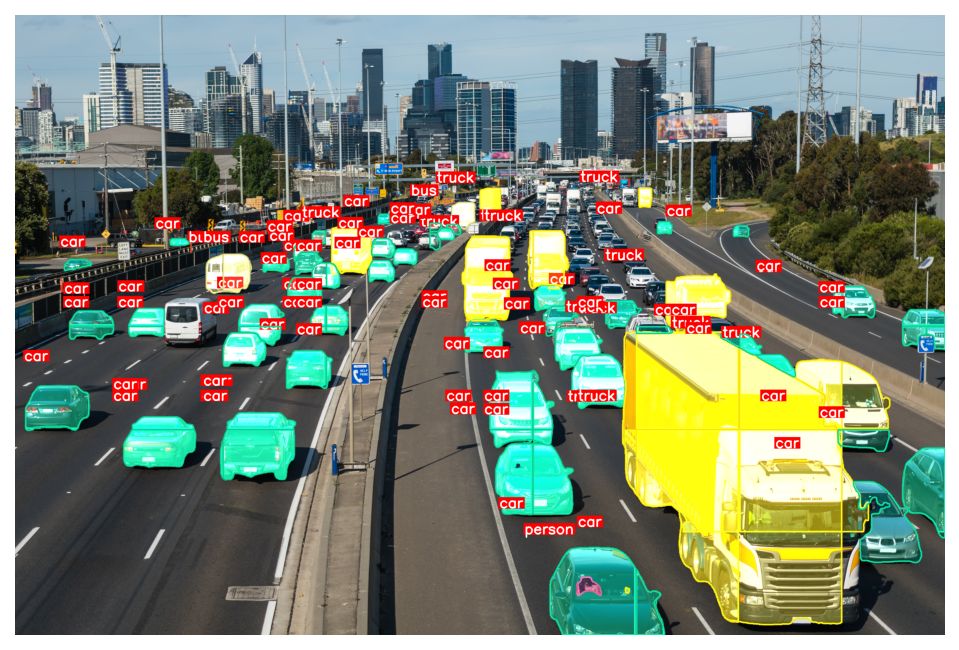

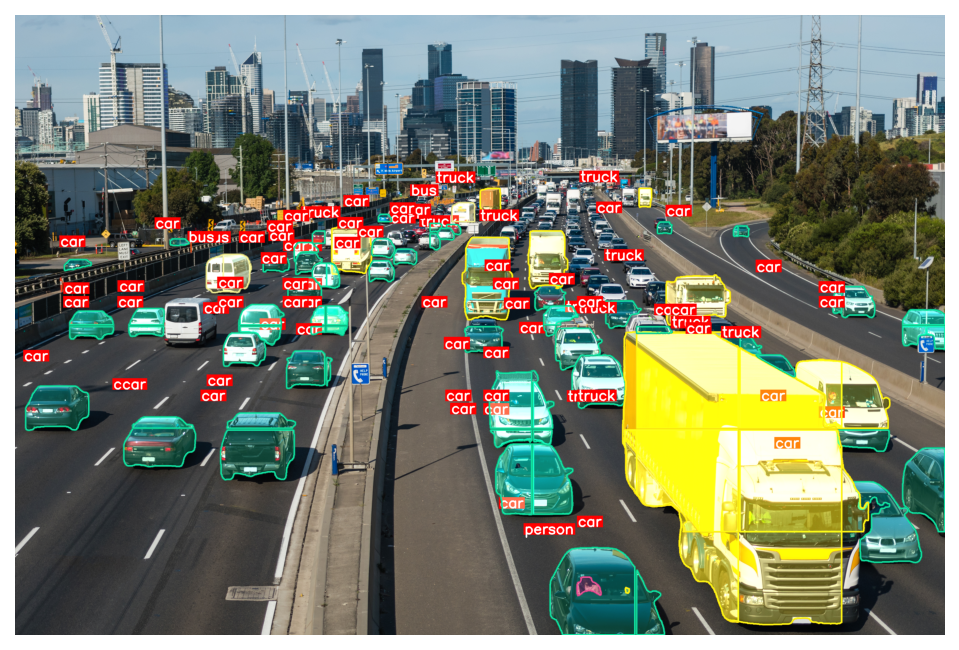

In [17]:
element_crops = MakeCropsDetectThem(image=img, model_path="yolov8m-seg.pt", segment=True, show_crops=False, shape_x=1000,
     shape_y=1000, overlap_x=50, overlap_y=50, conf=0.7, resize_results=False)
result = CombineDetectionsNode(element_crops, nms_iou=0.5)


visualize_results(
    img=result.image,
    confidences=result.detected_conf_list_full,
    boxes=result.detected_xyxy_list_full,
    masks=result.detected_masks_list_full,
    classes_ids=result.detected_cls_id_list_full,
    classes_names=result.detected_cls_names_list_full,
    segment=True,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=False,
    delta_colors=3,
)


visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    masks=result.filtered_masks,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    segment=True,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=False,
    delta_colors=3,
)